In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
from glob import glob
import gzip
import gc
import csv
import networkx as nx
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
key_term = "predestination"

In [3]:
def extract_five_grams(key_term):
    words = list()
    for i in dtm.keys():
        # get sums first before split
        count = int(dtm[i])
        i = i.split()
        if i[2] == key_term:
            for j in range(count):
                words.append(i[0])
                words.append(i[1])
                words.append(i[3])
                words.append(i[4])
    return(words)

In [4]:
files = glob("../texts/eebo/eebo-5gram-*gz")
labels = [os.path.basename(x).split(".")[0] for x in files]
labels = [x.split("-")[2] for x in labels]

In [5]:
five_gram_data = dict()

for i, y in enumerate(labels):   
    print("starting: {0}".format(files[i]))
    print(" loading five-grams...")
    
    csvfile = gzip.open(files[i],'rt')
    dtm = dict()
    reader = csv.reader(csvfile)
    for row in reader:
        dtm[row[0]] = row[1]
   
    terms = extract_five_grams(key_term)
    five_gram_data[labels[i]] = terms
    
    # free memory
    del dtm
    gc.collect()

starting: ../texts/eebo/eebo-5gram-1600.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1612.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1593.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1624.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1636.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1581.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1628.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1548.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1535.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1556.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1527.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1544.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1539.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1572.csv.gz
 load five-grams...
starting: ../texts/eebo/eebo-5gram-1560.csv.gz
 load five-gram

In [7]:
# now collect frequencies
year_frequencies = dict()
for y in five_gram_data:
    t = list()
    w = set(five_gram_data[y])
    for i in w:
        t.append([i,five_gram_data[y].count(i)])
    year_frequencies[y] = t

In [8]:
def bar_graph(key_term,year):
    labels = [x[0] for x in sorted(year_frequencies[year], key=lambda x: x[1], reverse=True)[:15]]
    data = [x[1] for x in sorted(year_frequencies[year], key=lambda x: x[1], reverse=True)[:15]]
    title = "{0}: {1}".format(key_term,year)
    plt.rcdefaults()
    ig, ax = plt.subplots()
    y = np.arange(len(data))
    ax.barh(y, data)
    ax.set_yticks(y)
    ax.set_yticklabels(labels)
    ax.invert_yaxis() 
    plt.title(title)
    plt.show()

In [9]:
def graph_year(key_term,year):
    G = nx.Graph()
    node_list = list()
    labels=dict()

    # ensure that we have our key term
    labels[key_term] = key_term
    G.add_node(key_term)
    
    center_term = dict()
    center_term[key_term] = (0,-20)
    
    for t, w in sorted(year_frequencies[year], key=lambda x: x[1], reverse=True)[:15]:
        G.add_node(t)
        node_list.append(t)
        G.add_edge(key_term,t,weight=w)
        labels[t] = t
   
    plt.figure(figsize=(15,12))   
    pos=nx.spring_layout(G,scale=2,k=10,pos=center_term,fixed=center_term)
    nx.draw_networkx_nodes(G,pos,node_color='lightblue',node_size=1500)
    nx.draw_networkx_labels(G,pos,labels,font_size=10)

    all_weights = []
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight'])
    unique_weights = list(set(all_weights))

    for weight in unique_weights:
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) 
                          if edge_attr['weight']==weight]
        width = weight*len(node_list)*3.0/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
    plt.show()

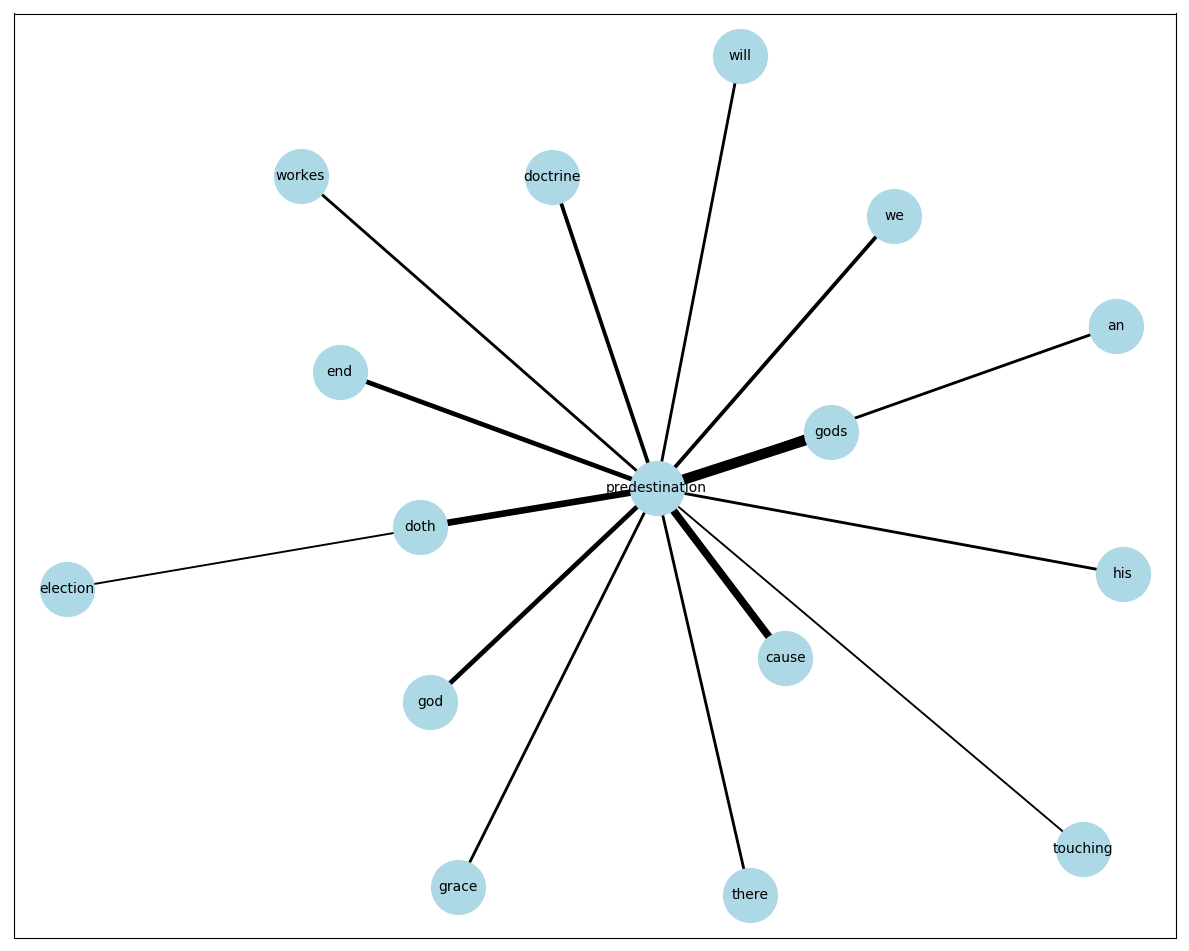

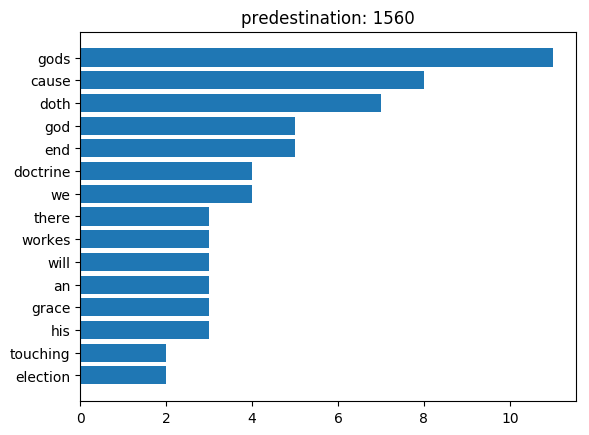

In [13]:
def graph(year):
    graph_year(key_term,year)
    bar_graph(key_term,year)

graph("1560")